In [1]:
from methods_analysis import *

# 1. Data description
## a. Load data

In [2]:
full_df = pd.read_parquet('datasets/input/full_df_clf_corrected.parquet')
pol_img_only = pd.read_parquet('datasets/input/pol_img_only.parquet')
pol_img_only_ref_results = pd.read_parquet('datasets/input/pol_img_only_ref_results.parquet')
non_pol_img_but_ref = pd.read_parquet('datasets/input/non_pol_img_but_ref.parquet')

In [10]:
daily_count_visual = pd.read_parquet('datasets/output__matrices_for_visualization/day_visual_politician_count.parquet')
weekly_count_visual = pd.read_parquet('datasets/output__matrices_for_visualization/week_visual_politician_count.parquet')

daily_count_tt = pd.read_parquet('datasets/output__matrices_for_visualization/day_titletext_sum.parquet')
weekly_count_tt = pd.read_parquet('datasets/output__matrices_for_visualization/week_titletext_sum.parquet')

In [11]:
# Define ordered list based on election results (#seats)
all_politicians = [
    'Geert Wilders', 'Frans Timmermans', 'Dilan Yesilgöz', 'Pieter Omtzigt',
    'Rob Jetten', 'Caroline van der Plas', 'Henri Bontebal', 'Lilian Marijnissen',
    'Stephan van Baarle', 'Thierry Baudet', 'Esther Ouwehand', 'Mirjam Bikker',
    'Kees van der Staaij', 'Laurens Dassen', 'Joost Eerdmans', 'Edson Olf',
    'Wybren van Haga'
]

all_parties = ['PVV', 'GL-PvdA', 'VVD', 'NSC', 'D66', 'BBB', 'CDA', 'SP', 'DENK', 'FVD', 'PvdD', 'CU', 'SGP', 'Volt', 'JA21', 'Bij1', 'BvNL']

politician_party = {
    'Geert Wilders': 'PVV',
    'Frans Timmermans': 'GL-PvdA',
    'Dilan Yesilgöz': 'VVD',
    'Pieter Omtzigt': 'NSC',
    'Rob Jetten': 'D66',
    'Caroline van der Plas': 'BBB',
    'Henri Bontebal': 'CDA',
    'Lilian Marijnissen': 'SP', 
    'Stephan van Baarle': 'DENK',
    'Thierry Baudet': 'FVD',
    'Esther Ouwehand': 'PvdD',
    'Mirjam Bikker': 'CU',
    'Kees van der Staaij': 'SGP',
    'Laurens Dassen': 'Volt',
    'Joost Eerdmans': 'JA21',
    'Edson Olf': 'Bij1',
    'Wybren van Haga': 'BvNL'
}

## b. Pre-processing

In [12]:
full_df['date'] = pd.to_datetime(full_df['date'])
full_df['week_year'] = full_df['date'].dt.strftime('%Y-%U')
full_df['date'] = pd.to_datetime(full_df['date']).dt.date

In [13]:
# Correct for wrongly listing
datasets = [full_df, pol_img_only, pol_img_only_ref_results, non_pol_img_but_ref]
for dataset in datasets:
    dataset['politician_in_img'] = dataset['politician_in_img'].apply(lambda x: sorted(x))


for party in ['PVV', 'GL-PvdA', 'VVD', 'NSC', 'D66', 'BBB', 'CDA', 'SP', 'FVD', 'PvdD', 
              'CU', 'SGP', 'DENK', 'Volt', 'JA21', 'Bij1', 'BvNL', 'Positions', 'Politics', 
              'Issues', 'Countries']:
    for title_txt_alttxt in ['title', 'paragraphs', 'alt_txt']:
        full_df[f"{party}_{title_txt_alttxt}"] = full_df[f"{party}_{title_txt_alttxt}"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [14]:
print(f'The full dataset contains the following columns: {full_df.columns.tolist()}')

The full dataset contains the following columns: ['idx', 'dataset', 'id', 'url', 'img_link', 'alt_txt', 'datetime', 'date', 'category', 'tags', 'comments_count', 'title', 'paragraphs', 'politician_in_img', 'PVV_title', 'GL-PvdA_title', 'VVD_title', 'NSC_title', 'D66_title', 'BBB_title', 'CDA_title', 'SP_title', 'FVD_title', 'PvdD_title', 'CU_title', 'SGP_title', 'DENK_title', 'Volt_title', 'JA21_title', 'Bij1_title', 'BvNL_title', 'Positions_title', 'Politics_title', 'Issues_title', 'Countries_title', 'PVV_paragraphs', 'GL-PvdA_paragraphs', 'VVD_paragraphs', 'NSC_paragraphs', 'D66_paragraphs', 'BBB_paragraphs', 'CDA_paragraphs', 'SP_paragraphs', 'FVD_paragraphs', 'PvdD_paragraphs', 'CU_paragraphs', 'SGP_paragraphs', 'DENK_paragraphs', 'Volt_paragraphs', 'JA21_paragraphs', 'Bij1_paragraphs', 'BvNL_paragraphs', 'Positions_paragraphs', 'Politics_paragraphs', 'Issues_paragraphs', 'Countries_paragraphs', 'PVV_alt_txt', 'GL-PvdA_alt_txt', 'VVD_alt_txt', 'NSC_alt_txt', 'D66_alt_txt', 'BBB_alt

## 2. Correlations

### a. By day

In [17]:
# Normalized matrices
normalized_visual = daily_count_visual.div(daily_count_visual.sum(axis=1), axis=0)
normalized_textual = daily_count_tt.div(daily_count_tt.sum(axis=1), axis=0)

In [18]:
# Correlation for each party 
correlation_dict = {}

for party in normalized_visual.columns:
    correlation = normalized_visual[party].corr(normalized_textual[party])
    correlation_dict[party] = correlation

correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['Correlation'])
correlation_df.index.name = 'Party'

print("Correlation between Visual and Textual Appearances for each Party:\n", correlation_df)

Correlation between Visual and Textual Appearances for each Party:
          Correlation
Party               
PVV         0.730485
GL-PvdA     0.744470
VVD         0.548294
NSC         0.619594
D66         0.325681
BBB         0.622710
CDA         0.345994
SP          0.461654
DENK        0.780549
FVD         0.773168
PvdD        0.913823
CU          0.322942
SGP         0.592401
Volt        0.485006
JA21        0.741083
Bij1        0.979517
BvNL        0.012486


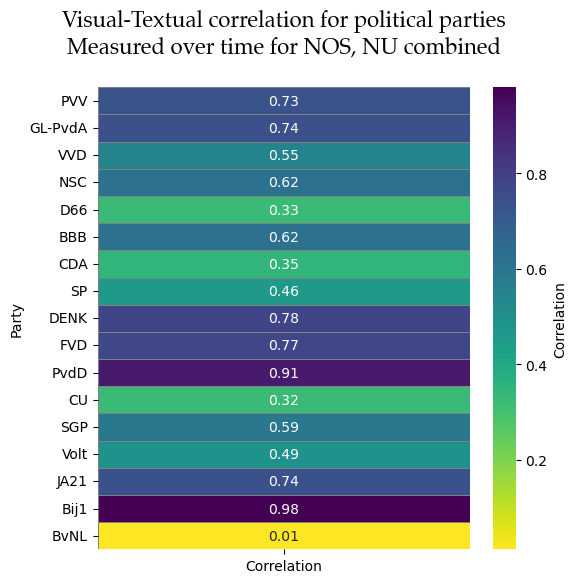

In [19]:
correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['Correlation'])
correlation_df.index.name = 'Party'

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_df[['Correlation']],
             cmap='viridis_r', 
             annot=True, 
             fmt=".2f", 
             cbar_kws={'label': 'Correlation'},
             linewidths=0.5, 
             linecolor='gray')


plt.title('Visual-Textual correlation for political parties\nMeasured over time for NOS, NU combined\n', fontdict=title_font)
plt.ylabel('Party')

# Display the plot
plt.show()


In [20]:
mean_correlation = correlation_df['Correlation'].mean()
print(f"\nOverall mean correlation between visual and textual appearances: {mean_correlation}")


Overall mean correlation between visual and textual appearances: 0.5882269286785686


In [24]:
print(f'Number of days with textual references to political parties and respective leaders: {normalized_textual.shape}')
print(f'Number of days with visual references to political party leaders: {normalized_visual.shape}')

Number of days with textual references to political parties and respective leaders: (122, 17)
Number of days with visual references to political party leaders: (91, 17)
